<a href="https://colab.research.google.com/github/charupandey-codes/Modeling-an-fMRI-time-series/blob/main/Biological_VBI_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!nvidia-smi

Tue Oct 21 08:38:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
!pip install cupy-cuda12x

In [6]:
!pip install vbi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached swig-4.3.1.post0-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 5.9 MB/s eta 0:00:00
Using cached swig-4.3.1.post0-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.9 MB)
  Created wheel for vbi: filename=vbi-0.3-cp312-cp312-linux_x86_64.whl size=10851196 sha256=b26a325f9232010f7095d076b29bcf38a1922b751528b5855fc1b5cb551b8a0c
  Stored in directory: /root/.cache/pip/wheels/14/35/5a/f474753d00953209eb69cf4e82d8c68726efe4fecc5bafa420
Successfully built vbi


In [7]:
import numpy as np
from vbi import LoadSample
import matplotlib.pyplot as plt
from numpy.random import uniform
from vbi.models.cupy.ghb import GHB_sde

In [8]:
seed = 2
np.random.seed(seed)

In [9]:
LABESSIZE = 14
plt.rcParams["axes.labelsize"] = LABESSIZE
plt.rcParams["xtick.labelsize"] = LABESSIZE
plt.rcParams["ytick.labelsize"] = LABESSIZE

In [10]:
weights = LoadSample(nn=84).get_weights()
nn = len(weights)

In [11]:
freq = uniform(0.02, 0.04, nn)
omega = 2 * np.pi * freq

In [12]:
eta_mu = -1.
eta_std = 1.
eta_heter_rnd = np.random.randn(nn)
eta = eta_mu+eta_std * eta_heter_rnd

In [13]:
Gs = np.linspace(1, 25, 5)
num_sim = len(Gs)

In [14]:
Gs

array([ 1.,  7., 13., 19., 25.])

In [15]:
params = {
    "eta": eta,
    "dt": 0.01,
    "num_sim": num_sim,
    "sigma": 0.1,
    "t_cut": 10.0,
    "t_end": 60.0,
    "G": Gs,
    "decimate": 10,
    "omega": omega,
    "engine": "gpu",
    "weights": weights,
    "initial_state": uniform(0, 1, (2 * nn, num_sim)),
}

In [16]:
obj = GHB_sde(params)
data = obj.run()
t = data['t']
bold = data['bold']
print(t.shape, bold.shape)

Integrating: 100%|██████████| 6000/6000 [00:23<00:00, 252.58it/s]

(499,) (84, 499, 5)


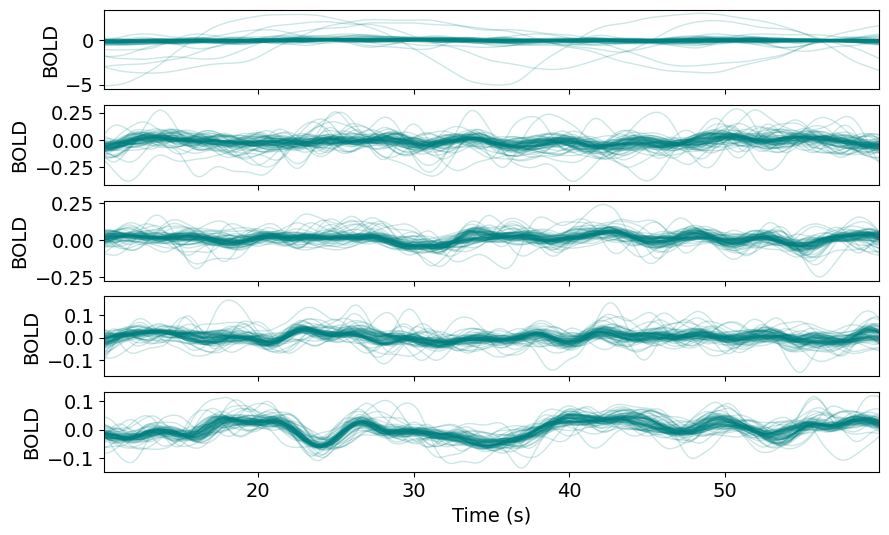

In [18]:
num_sim = 5
fig, ax = plt.subplots(num_sim, figsize=(10, 6), sharex=True)
for i in range(num_sim):
    ax[i].plot(t, bold[:, :, i].T, lw=1, alpha=0.2, color='teal')
    ax[i].set_ylabel("BOLD")
ax[-1].set_xlabel("Time (s)")
ax[0].margins(x=0)
plt.show()